<a href="https://colab.research.google.com/github/ghbihuy/Datawarehousing-Automation-with-GCP-Airflow/blob/master/KHDL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Họ và tên: Lưu Quang Huy

Lớp: DS002

MSSV: 31211027642

Colab link: https://colab.research.google.com/drive/185MgvWAkLDw-8A2IFT8nV1Ane6YWjWOy#scrollTo=KztDN8OoYb4-


# 1. Data Description:
 
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data


## 1.1. Introduction

The Hotel Booking demand dataset contains booking information for a city hotel and a resort hotel. It includes information such as booking time, length of stay, number of adults, children/babies, number of available parking spaces, among other things. This dataset is ideal for anyone looking to practice their exploratory data analysis (EDA) or get started in building predictive models.

## 1.2. Data source and data set.



* *italicized text* Dataset link: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

# 2. Load the Packages and Data 


In [ ]:
# Import library or module
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
# Unzip data
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
!wget https://raw.githubusercontent.com/ghbihuy/SQL-Project-Code/main/hotel_bookings.csv

--2023-02-21 07:26:27--  https://raw.githubusercontent.com/ghbihuy/SQL-Project-Code/main/hotel_bookings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16855599 (16M) [text/plain]
Saving to: ‘hotel_bookings.csv’

hotel_bookings.csv  100%[===================>]  16.07M  --.-KB/s    in 0.1s    

2023-02-21 07:26:29 (108 MB/s) - ‘hotel_bookings.csv’ saved [16855599/16855599]



In [ ]:
# Read the insurance dataframe
hotel = pd.read_csv("hotel_bookings.csv")

# 3. Data Profiling (Data Exploration)


## 3.1. Understanding the Dataset (Basic information about dataset)


In [ ]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
hotel.shape

(119390, 32)

In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel.size

3820480

In [ ]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hotel.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [ ]:
hotel.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

## 3.2. **Data Preperation(Data Cleaning)**
- Check missing values
- Fill null values

In [ ]:
hotel.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
miss= hotel.isnull().sum()
miss

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Show in %
miss1 = hotel.isnull().sum() / len(hotel) * 100
miss1

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [ ]:
# making copy of dataset for changes
hotel_copy = hotel.copy()
hotel_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_copy = hotel_copy.dropna(how='any',subset=['children', 'agent'])
hotel.shape, hotel_copy.shape

((119390, 32), (103048, 32))

In [ ]:
import random
hotel_copy.fillna({'country':'missing', 'company':'missing'}, inplace=True)

In [ ]:
hotel_copy.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## 3.2. Pre-Profiling



In [ ]:
# import pandas_profiling as prf
# hotel_profile = prf.ProfileReport(hotel)
# hotel_profile

## 3.3. Preprocessing
* Dealing with duplicate rows
  - Find number of duplicate rows in the dataset.
  - Print the duplicate entries and analyze.
  - Drop the duplicate entries from the dataset.

In [ ]:
hotel[hotel.duplicated()] # to shows the dupbicate rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [ ]:
# Show the sum of duplicate rows
hotel.duplicated().sum()

31994

In [ ]:
# Drop duplicate rows
hotel_copy.drop_duplicates(inplace=True)

In [ ]:
hotel_copy.shape

(75201, 32)

# 4. EDA Question

In [ ]:
hotel_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,missing,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,missing,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,missing,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,missing,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,missing,0,Transient,105.5,0,0,Canceled,2015-04-22


## 4.1. Show the frequency for each customer_type in the dataset

In [ ]:
hotel_copy['customer_type'].value_counts()

Transient          62598
Transient-Party     9025
Contract            3127
Group                451
Name: customer_type, dtype: int64

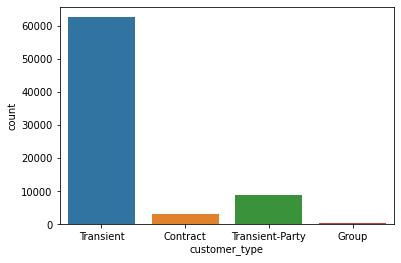

In [ ]:
sns.countplot(x='customer_type', data=hotel_copy)

- The vertical axis shows the **counts** for each **customer type** on horizon axis

- The majority of customer_type is **Transient** with 62598, as opposed to **Group** with 451 value. 


## 4.2. What's the Correlation between the features?


In [ ]:
hotel_copy.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
hotel_copy.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.171157,0.090908,-0.006401,0.003714,0.040222,0.065694,0.060381,0.065545,-0.021216,-0.052856,0.062883,-0.040792,-0.083957,-0.044331,-0.001125,0.114798,-0.181282,-0.149057
lead_time,0.171157,1.000000,0.149207,0.094318,0.005680,0.206580,0.280378,0.094275,0.016277,-0.005293,-0.082071,0.028450,-0.048777,0.076366,0.023680,0.131714,-0.021472,-0.084555,0.006268
arrival_date_year,0.090908,0.149207,1.000000,-0.504509,-0.009125,-0.000580,-0.002121,0.062689,0.046463,-0.021079,0.007570,-0.076507,0.011950,0.010514,-0.020146,-0.036148,0.195292,-0.043429,0.057989
arrival_date_week_number,-0.006401,0.094318,-0.504509,1.000000,0.089927,0.020094,0.028201,0.009641,0.008927,0.011925,-0.022298,0.008641,-0.027740,0.016935,0.017693,0.017084,0.088962,0.007208,0.048279
arrival_date_day_of_month,0.003714,0.005680,-0.009125,0.089927,1.000000,-0.018788,-0.027908,0.001130,0.014864,-0.002844,-0.002790,-0.007198,0.001493,0.007658,0.008816,0.007253,0.019117,0.005134,-0.002332
stays_in_weekend_nights,0.040222,0.206580,-0.000580,0.020094,-0.018788,1.000000,0.536750,0.059735,0.017189,0.014561,-0.061231,-0.009011,-0.037927,0.038695,0.126840,-0.038088,-0.006347,-0.037414,0.000716
stays_in_week_nights,0.065694,0.280378,-0.002121,0.028201,-0.027908,0.536750,1.000000,0.069322,0.019928,0.015542,-0.064399,-0.006320,-0.037003,0.065943,0.165024,-0.003208,0.011367,-0.038979,0.003270
adults,0.060381,0.094275,0.062689,0.009641,0.001130,0.059735,0.069322,1.000000,0.001770,0.010414,-0.094812,-0.014290,-0.063861,-0.048347,-0.036649,-0.026717,0.257424,0.027942,0.098166
children,0.065545,0.016277,0.046463,0.008927,0.014864,0.017189,0.019928,0.001770,1.000000,0.009875,-0.022919,-0.012784,-0.015461,0.038484,0.028050,-0.021674,0.332484,0.045732,0.026106
babies,-0.021216,-0.005293,-0.021079,0.011925,-0.002844,0.014561,0.015542,0.010414,0.009875,1.000000,-0.008346,-0.003169,-0.004255,0.092740,0.035217,-0.006770,0.018143,0.032840,0.088524


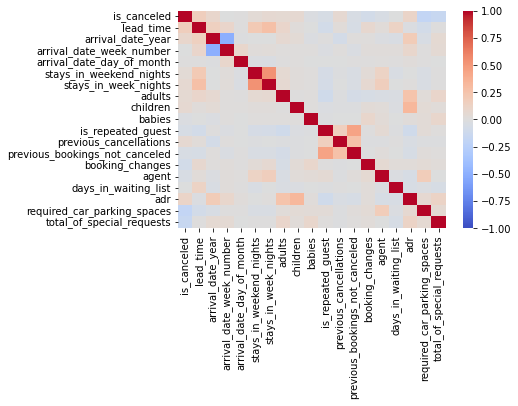

In [ ]:
sns.heatmap(hotel_copy.corr(), cmap='coolwarm', vmin=-1, vmax=1)

⚓ Show the variables having correlation greater 0.3

In [ ]:
m = hotel_copy.corr() > 0.3

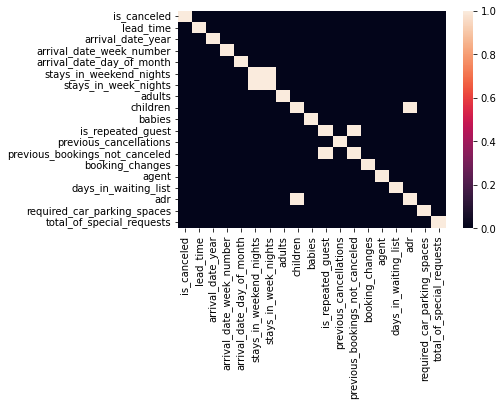

In [ ]:
sns.heatmap(data=m)

Notice **Adults** and **Adr** variable have the correlation greater than 0.3

## 4.3. Information about stay in week night


In [ ]:
hotel_copy['stays_in_week_nights'].value_counts().sort_index()

0      4534
1     16893
2     18391
3     14907
4      7248
5      9129
6      1262
7       887
8       557
9       189
10      906
11       44
12       37
13       23
14       23
15       62
16       13
17        3
18        5
19       18
20       36
21       14
22        5
25        4
26        1
30        5
33        1
34        1
40        2
41        1
Name: stays_in_week_nights, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


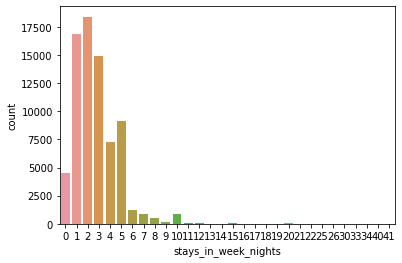

In [ ]:
sns.countplot(hotel_copy['stays_in_week_nights'])

In [ ]:
(hotel_copy['stays_in_week_nights'].value_counts().sort_index()[1]
+ hotel_copy['stays_in_week_nights'].value_counts().sort_index()[2]
+ hotel_copy['stays_in_week_nights'].value_counts().sort_index()[3]) / len(hotel_copy)

0.6674246353107006

In [ ]:
(hotel_copy['stays_in_week_nights'].value_counts().sort_index()[4]
+ hotel_copy['stays_in_week_nights'].value_counts().sort_index()[5]) / len(hotel_copy)

0.21777635935692344

- The vertical axis shows the **count** of each **stays in week nights** on horizon axis

- The majority of stays in week night is **1, 2, 3** with 66.72 percent. 

## 4.4. The propotion of each deposit type

In [ ]:
hotel_copy['deposit_type'].value_counts()

No Deposit    74319
Non Refund      846
Refundable       36
Name: deposit_type, dtype: int64

In [ ]:
hotel_copy['deposit_type'].value_counts() / len(hotel_copy) * 100

No Deposit    98.827143
Non Refund     1.124985
Refundable     0.047872
Name: deposit_type, dtype: float64

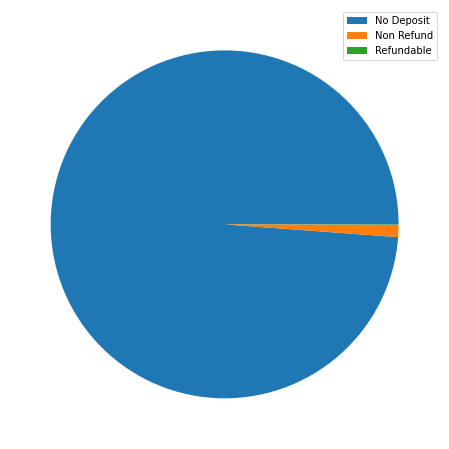

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(hotel_copy['deposit_type'].value_counts())
plt.legend(hotel_copy['deposit_type'].value_counts().index)

- There are three type of deposit type
- A majority of deposit type is **no deposit**, but have a little **non refund** rate. The deposit type's rarely having some one **refunable**

## 4.5. What year have the most counts of arrival?


In [ ]:
hotel_copy.arrival_date_year.value_counts()

2016    36335
2017    27896
2015    10970
Name: arrival_date_year, dtype: int64

In [ ]:
# Proportion of each year (percent)
hotel_copy.arrival_date_year.value_counts() / len(hotel_copy) * 100


2016    48.317177
2017    37.095251
2015    14.587572
Name: arrival_date_year, dtype: float64

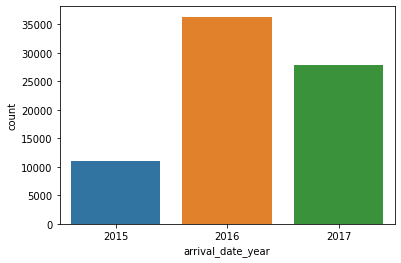

In [ ]:
sns.countplot(x='arrival_date_year', data=hotel_copy)

- 2016 is the most of count for arrival, less than is the 2017 with 37.09 percent


## 4.6. Resort Hotel and City Hotel, which one have the most count of arrival?

In [ ]:
hotel_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,missing,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,missing,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,missing,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,missing,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,missing,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
hotel_copy.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
# Count for each hotel
hotel_copy.hotel.value_counts()

City Hotel      47839
Resort Hotel    27362
Name: hotel, dtype: int64

In [ ]:
# Proportion for count of arrival for each hotel (percent)
hotel_copy.hotel.value_counts() / len(hotel_copy) * 100

City Hotel      63.614846
Resort Hotel    36.385154
Name: hotel, dtype: float64

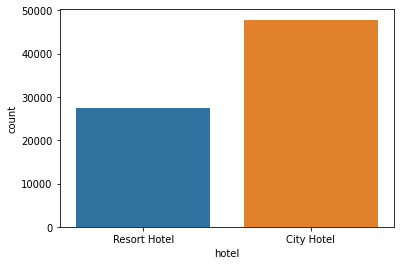

In [ ]:
sns.countplot(x='hotel', data=hotel_copy)

- **City Hotel** is greater than **Resort Hotel** even approximately 30% percent
- **Resort Hotel** is less two times compire with **City Hotel**